In [2]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 6.7 kB/s eta 0:00:011    |████████████▊                   | 69.3 MB 13.8 MB/s eta 0:00:08     |████████████████████▌           | 111.1 MB 9.2 MB/s eta 0:00:07     |███████████████████████         | 124.6 MB 9.5 MB/s eta 0:00:06     |██████████████████████████▏     | 141.9 MB 6.1 MB/s eta 0:00:06     |███████████████████████████▍    | 148.7 MB 1.8 MB/s eta 0:00:14


In [5]:
import xgboost
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [11]:
(X, y) = datasets.load_diabetes(return_X_y=True)

In [14]:
X.shape, y.shape

((442, 10), (442,))

In [20]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [21]:
model = xgboost.XGBRegressor()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(model.predict(X_test), y_test)

4088.468276117727

In [27]:
from sklearn.preprocessing import Normalizer

In [33]:
n = Normalizer()
X_train_norm = n.fit_transform(X_train)
X_test_norm = n.transform(X_test)

In [34]:
model2 = xgboost.XGBRegressor()

In [35]:
model2.fit(X_train_norm, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
mean_squared_error(model2.predict(X_test_norm), y_test)

3577.371037443091

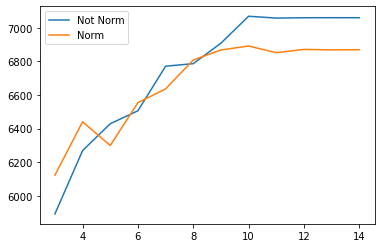

In [67]:
a1 = []
a2 = []
x = range(3, 15)

for md in range(3, 15):
    model = xgboost.XGBRegressor(max_depth=md, learning_rate=0.01)
    model2 = xgboost.XGBRegressor(max_depth=md, learning_rate=0.01)
    
    model.fit(X_train, y_train)
    model2.fit(X_train_norm, y_train)
    
    a1.append(mean_squared_error(model.predict(X_test), y_test))
    a2.append(mean_squared_error(model2.predict(X_test_norm), y_test))
    
plt.plot(x, a1, label="Not Norm")
plt.plot(x, a2, label="Norm")
plt.legend()

Здесь я построил 2 модели, одна из которых обучается на нормализованных данных. В качестве иллюстрации привел графики зависимости MSE от разной максимальной глубины деревьев. Как мы видим, оба графика в целом схожи и не сильно различаются, что может говорить о том, что нормализация данных не влияет на качество градиентного бустинга